# A Song of Ice and Fire Analysis

## Data preprocessing

In [58]:
import json
import os
import pandas as pd

In [59]:
# Define the directory path for saving CSV files
output_dir = 'src/data/csv/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

In [60]:
# Load the data from the JSON files
with open('src/data/json/characters.json', 'r', encoding='utf-8') as file:
    characters_data = json.load(file)[0]

In [61]:
characters = []

# Extract the data for each character
for character_key, character_value in characters_data.get('humans', {}).items():
    character = {'id': character_key, **character_value}
    characters.append(character)

# Convert the data to a DataFrame
characters_df = pd.DataFrame(characters)

# Save the data to a CSV file
characters_df.to_csv(output_dir + 'characters_test.csv', index=False)
display(characters_df.head())

,id,name,alias(es),gender,house(s),allegiance(s),title(s),family,race,culture(s),religion,physical description,birth,death,first appearance,last appearance
0,Aegon I Targaryen,Aegon Targaryen,"[{'book': 'A Game of Thrones', 'chapter': 3, '...",Male,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",None,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",{'father': 'Aerion Targaryen (son of Daemion)'...,Valyrian,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",Faith of the Seven,"{'eye color': 'Purple', 'hair color': 'Silver-...","{'continent': 'Westeros', 'region': 'Crownland...","{'continent': 'Westeros', 'region': 'The Crown...",None,None
1,Aegon II Targaryen,Aegon Targaryen,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",Male,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",None,"[{'book': 'A Game of Thrones', 'chapter': 0, '...","{'father': 'Viserys I Targaryen', 'mother': 'A...",Valyrian,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",Faith of the Seven,"{'eye color': 'Violet', 'hair color': 'Silver-...","{'continent': 'Westeros', 'region': 'The Crown...","{'continent': 'Westeros', 'region': 'The Crown...",None,None
2,Aegon Targaryen (son of Rhaegar),Aegon Targaryen,"[{'book': 'A Clash of Kings', 'chapter': 48, '...",Male,"[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': 'A Game of Thrones', 'chapter': 0, '...","{'father': 'Rhaegar Targaryen', 'mother': 'Eli...",Valyrian,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",None,"{'eye color': 'Purple', 'hair color': 'Silver-...","{'continent': 'Westeros', 'region': 'Crownland...","{'continent': 'Westeros', 'region': 'The Crown...",None,None
3,Aemon Targaryen (son of Maekar I),Aemon Targaryen,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",Male,"[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': None, 'chapter': None, 'title': 'Mae...","{'father': 'Maekar I Targaryen', 'mother': 'Dy...",Valyrian,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",Faith of the Seven,"{'eye color': 'Milk white', 'hair color': 'Whi...","{'continent': 'Westeros', 'region': 'The Crown...","{'continent': 'Westeros', 'region': 'The Crown...",None,None
4,Aemon Targaryen (son of Viserys II),Aemon Targaryen,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",Male,"[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': 'A Game of Thrones', 'chapter': 0, '...","{'father': 'Viserys II Targaryen', 'mother': '...",Valyrian,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",Faith of the Seven,"{'eye color': 'Purple', 'hair color': 'Silver-...","{'continent': 'Westeros', 'region': 'The Crown...","{'continent': None, 'region': None, 'location'...",None,None


In [62]:
# Check for missing values
missing_values = characters_df.isnull().sum()
missing_values

id                       0
name                     2
alias(es)               43
gender                   0
house(s)                31
allegiance(s)           14
title(s)                16
family                   0
race                    46
culture(s)               1
religion                44
physical description     0
birth                   19
death                   41
first appearance        55
last appearance         55
dtype: int64

In [63]:
# Check for missing names and cultures
missing_names = characters_df[characters_df['name'].isnull()]
missing_cultures = characters_df[characters_df['culture(s)'].isnull()]

display(missing_names)
display(missing_cultures)

,id,name,alias(es),gender,house(s),allegiance(s),title(s),family,race,culture(s),religion,physical description,birth,death,first appearance,last appearance
38,Girl bought to please the king,None,None,Female,None,None,None,"{'father': None, 'mother': None, 'sibling(s)':...",None,"[{'book': 'A Game of Thrones', 'chapter': 0, '...",None,"{'eye color': 'Blue', 'hair color': 'Blond'}",None,None,"{'book': 'A Game of Thrones', 'chapter': 3}","{'book': 'A Game of Thrones', 'chapter': 3}"
41,High Septon (fat one),None,"[{'book': 'A Feast for Crows', 'chapter': 8, '...",Male,None,"[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': 'A Game of Thrones', 'chapter': 0, '...","{'father': None, 'mother': None, 'sibling(s)':...",None,None,Faith of the Seven,"{'eye color': None, 'hair color': 'Grey'}",None,"{'continent': 'Westeros', 'region': 'The Crown...",None,None


,id,name,alias(es),gender,house(s),allegiance(s),title(s),family,race,culture(s),religion,physical description,birth,death,first appearance,last appearance
41,High Septon (fat one),None,"[{'book': 'A Feast for Crows', 'chapter': 8, '...",Male,None,"[{'book': 'A Game of Thrones', 'chapter': 0, '...","[{'book': 'A Game of Thrones', 'chapter': 0, '...","{'father': None, 'mother': None, 'sibling(s)':...",None,None,Faith of the Seven,"{'eye color': None, 'hair color': 'Grey'}",None,"{'continent': 'Westeros', 'region': 'The Crown...",None,None


In [64]:
def extract_values(item, key):
    """
    Extracts values associated with a specific key from a list of dictionaries or a single dictionary.
    
    Parameters:
    - item: The input data, which can be a list of dictionaries, a single dictionary, or another type.
    - key: The key whose associated values need to be extracted.
    
    Returns:
    - A list of extracted values if the input is a list of dictionaries.
    - A single value if the input is a dictionary.
    - The original item if it's neither a list nor a dictionary.
    """
    if isinstance(item, list):
        if not item:
            return []
        return [element.get(key) if isinstance(element, dict) else element for element in item]
    elif isinstance(item, dict):
        if isinstance(key, tuple):
            # If the key is a tuple, apply extract_values recursively
            return extract_values(item.get(key[0]), key[1])
        if key == 'continent':
            print(item)
            print(item.get(key))
        return item.get(key)
    return item

def replace_columns(df, old_col, new_cols):
    """
    Replaces an existing column with multiple new columns while preserving the column order.
    
    Parameters:
    - df: The pandas DataFrame.
    - old_col: The name of the column to be replaced.
    - new_cols: A dictionary where keys are new column names and values are the data for these columns.
    
    Returns:
    - None. The DataFrame is modified in place.
    """
    if old_col not in df.columns:
        return
    # Get the index of the column to be replaced
    col_idx = df.columns.get_loc(old_col)
    # Drop the old column
    df.drop(columns=[old_col], inplace=True)
    # Insert each new column at the correct position
    for i, (new_col, data) in enumerate(new_cols.items()):
        df.insert(col_idx + i, new_col, data)

# Mapping of columns to transform and their corresponding keys to extract
columns_to_extract = {
    'title(s)': 'title',
    'house(s)': 'house',
    'culture(s)': 'culture',
    'allegiance(s)': 'allegiance',
    'alias(es)': 'alias',
}

# Mapping for 'family' related columns
family_columns = {
    'father': 'father',
    'mother': 'mother',
    'sibling(s)': ('sibling(s)', 'sibling'),
    'child(ren)': ('child(ren)', 'child'),
    'spouse(s)': ('spouse(s)', 'spouse'),
    'lover(s)': ('lover(s)', 'lover'),
}

# Mapping for location-related columns
location_columns = {
    'birth': {
        'birth_continent': 'continent',
        'birth_region': 'region',
        'birth_location': 'location',
        'birth_date': 'date'
    },
    'death': {
        'death_continent': 'continent',
        'death_region': 'region',
        'death_location': 'location',
        'death_date': 'date',
        'death_reason': ('by', 'type'),
        'killed_by': ('by', 'name')
    }
}

# Mapping for appearance-related columns
appearance_columns = {
    'first appearance': {
        'first_appearance_book': 'book',
        'first_appearance_chapter': 'chapter'
    },
    'last appearance': {
        'last_appearance_book': 'book',
        'last_appearance_chapter': 'chapter'
    }
}

# Mapping for physical description columns
physical_description_columns = {
    'eye color': 'eye color',
    'hair color': 'hair color'
}

# Transform simple columns based on the mappings
for col, key in columns_to_extract.items():
    if col in characters_df.columns:
        characters_df[col] = characters_df[col].apply(lambda x: extract_values(x, key))

# Transform 'family' related columns
if 'family' in characters_df.columns:
    new_family_cols = {}
    for new_col, key in family_columns.items():
        # Extract the value using the specified key
        new_family_cols[new_col] = characters_df['family'].apply(lambda family: extract_values(family, key) if isinstance(family, dict) else None)
    replace_columns(characters_df, 'family', new_family_cols)

# Transform physical description columns
if 'physical description' in characters_df.columns:
    new_physical_cols = {}
    for new_col, key in physical_description_columns.items():
        new_physical_cols[new_col] = characters_df['physical description'].apply(lambda item: extract_values(item, key))
    replace_columns(characters_df, 'physical description', new_physical_cols)

# Transform location-related columns
for old_col, mappings in location_columns.items():
    if old_col in characters_df.columns:
        new_cols = {}
        for new_col, key in mappings.items():
            new_cols[new_col] = characters_df[old_col].apply(lambda item: extract_values(item, key))
        replace_columns(characters_df, old_col, new_cols)

# Transform appearance-related columns
for old_col, mappings in appearance_columns.items():
    if old_col in characters_df.columns:
        new_cols = {}
        for new_col, key in mappings.items():
            new_cols[new_col] = characters_df[old_col].apply(lambda item: extract_values(item, key))
        replace_columns(characters_df, old_col, new_cols)

# Save the transformed data to a CSV file
characters_df.to_csv(output_dir + 'characters_test.csv', index=False)
characters_df.head(11)

{'continent': 'Westeros', 'region': 'Crownlands', 'location': 'Dragonstone', 'date': '27 BC'}
Westeros
{'continent': 'Westeros', 'region': 'The Crownlands', 'location': "King's Landing", 'date': '107 AC'}
Westeros
{'continent': 'Westeros', 'region': 'Crownlands', 'location': 'Dragonstone', 'date': '281 AC or 282 AC'}
Westeros
{'continent': 'Westeros', 'region': 'The Crownlands', 'location': "King's Landing", 'date': '198 AC'}
Westeros
{'continent': 'Westeros', 'region': 'The Crownlands', 'location': "King's Landing", 'date': '136 AC'}
Westeros
{'continent': 'Westeros', 'region': 'Crownlands', 'location': "King's Landing", 'date': '244 AC'}
Westeros
{'continent': 'Westeros', 'region': 'The North', 'location': 'Winterfell', 'date': '289 AC'}
Westeros
{'continent': 'Westeros', 'region': 'The Iron Islands', 'location': 'Pyke', 'date': '255 AC - 261 AC'}
Westeros
{'continent': 'Westeros', 'region': 'The Stormlands', 'location': 'Harvest Hall', 'date': '236 AC or 237 AC'}
Westeros
{'continen

,id,name,alias(es),gender,house(s),allegiance(s),title(s),father,mother,sibling(s),...,death_continent,death_region,death_location,death_date,death_reason,killed_by,first_appearance_book,first_appearance_chapter,last_appearance_book,last_appearance_chapter
0,Aegon I Targaryen,Aegon Targaryen,"[Aegon the Conqueror, Aegon the Dragonlord, Ae...",Male,[Targaryen],None,"[Lord of Dragonstone, King of All Westeros, Sh...",Aerion Targaryen (son of Daemion),Valaena Velaryon,"[Rhaenys Targaryen, Visenya Targaryen]",...,Westeros,The Crownlands,Dragonstone,37 AC,Nature,Stroke,None,NaN,None,NaN
1,Aegon II Targaryen,Aegon Targaryen,"[Aegon the Elder, Aegon the Elder]",Male,[Targaryen],None,"[King of the Andals, the Rhoynar, and the Firs...",Viserys I Targaryen,Alicent Hightower,"[Aemond Targaryen, Daeron Targaryen (son of Vi...",...,Westeros,The Crownlands,King's Landing,131 AC,None,None,None,NaN,None,NaN
2,Aegon Targaryen (son of Rhaegar),Aegon Targaryen,[The prince that was promised],Male,[Targaryen],[House Targaryen],[Prince],Rhaegar Targaryen,Elia Martell,[Rhaenys Targaryen (daughter of Rhaegar)],...,Westeros,The Crownlands,King's Landing,283 AC,Character,Gregor Clegane,None,NaN,None,NaN
3,Aemon Targaryen (son of Maekar I),Aemon Targaryen,"[Aemon Targaryen, Uncle Maester]",Male,[Targaryen],"[Night's Watch, House Targaryen, The Citadel]","[Maester at Dragonstone, Maester at Castle Bla...",Maekar I Targaryen,Dyanna Dayne,"[Aerion Targaryen, Daeron Targaryen (son of Ma...",...,Westeros,The Crownlands,King's Landing,300 AC,Nature,Old age,None,NaN,None,NaN
4,Aemon Targaryen (son of Viserys II),Aemon Targaryen,"[The Dragonknight, The Knight of Tears]",Male,[Targaryen],"[House Targaryen, Kingsguard]","[Ser, Lord Commander of the Kingsguard, Prince]",Viserys II Targaryen,Larra Rogare,"[Aegon IV Targaryen, Naerys Targaryen]",...,None,None,None,172 AC,Character,Myles Toyne,None,NaN,None,NaN
5,Aerys II Targaryen,Aerys Targaryen,"[The Mad King, Mad King Aerys, King Scab, Aery...",Male,[Targaryen],None,"[Prince of Dragonstone, King of the Andals, th...",Jaehaerys II Targaryen,Shaera Targaryen,[Rhaella Targaryen],...,Westeros,The Crownlands,King's Landing,283 AC,Character,Jaime Lannister,None,NaN,None,NaN
6,Aethelmure,Aethelmure,None,Male,None,[The Citadel],[Grand Maester],None,None,None,...,None,None,None,None,None,None,None,NaN,None,NaN
7,Arryk Cargyll,Arryk Cargyll,[One of 'the celebrated Cargyll twins'],Male,[Cargyll],"[House Cargyll, Kingsguard, Greens]",[Ser],None,None,[Erryk Cargyll],...,[Westeros],[The Crownlands],[Dragonstone],[129 AC],[None],[None],None,NaN,None,NaN
8,Arthur Dayne,Arthur Dayne,None,Male,[Dayne],"[House Dayne, Kingsguard]","[Ser, Sword of the Morning]",None,None,None,...,[Westeros],[The Stormlands],[Tower of Joy],[283 AC],[None],[None],None,NaN,None,NaN
9,Arya Stark,Arya Stark,"[Arya Horseface, Arya Underfoot, Arry, Lumpyhe...",Female,[Stark],"[House Stark, Faceless Men]","[Princess, Lady of Winterfell, Acolyte]",Eddard Stark,Catelyn Stark,"[Bran Stark, Jon Snow, Rickon Stark, Robb Star...",...,None,None,None,None,None,None,A Game of Thrones,0.0,A Game of Thrones,10.0


In [ ]:
str_columns = ['name', 'gender', 'father', 'mother', 'race', 'religion', 'eye color', 'hair color', 'birth_continent', 'birth_region', 'birth_location', 'birth_date', 'death_continent', 'death_region', 'death_location', 'death_date', 'death_reason', 'killed_by', 'first_appearance_book', 'last_appearance_book']

# Replace missing values in string columns with empty strings
characters_df[str_columns] = characters_df[str_columns].fillna('Unknown')

def convert_to_string(x):
    if isinstance(x, list):
        if all(pd.isnull(i) for i in x):
            return 'Unknown'
        return ', '.join(x)
    return x

# Convert all string columns to string data if they contain lists
characters_df[str_columns] = characters_df[str_columns].applymap(convert_to_string)

list_columns = ['title(s)', 'house(s)', 'culture(s)', 'allegiance(s)', 'alias(es)', 'sibling(s)', 'child(ren)', 'spouse(s)', 'lover(s)']

# Replace missing values in list columns with empty lists
characters_df[list_columns] = characters_df[list_columns].fillna(value='[]')
characters_df.head()

int_columns = ['first_appearance_chapter', 'last_appearance_chapter']

# Replace missing values in integer columns with -1
characters_df[int_columns] = characters_df[int_columns].fillna(-1)
characters_df.head()

[None]
['Westeros']
['Westeros']
['Westeros']
[None]
[None]
['Dorne']
['Dorne']
['The Crownlands']
[None]
[None]
[None]
[None]
[None]
[None]
['89 AC or before']
['260 AC or before']
['260 AC - 269 AC']
['249 AC - 260 AC']
['89 AC or before']
['Westeros']
['Westeros']
['Westeros']
['Westeros']
['The Crownlands']
['The Stormlands']
['Dorne']
['The Crownlands']
['Dragonstone']
['Tower of Joy']
['Starfall']
['Dragonstone']
['129 AC']
['283 AC']
['283 AC']
['129 AC']
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]


C:\Users\justi\AppData\Local\Temp\ipykernel_18624\1668054542.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  characters_df[str_columns] = characters_df[str_columns].applymap(convert_to_string)


,id,name,alias(es),gender,house(s),allegiance(s),title(s),father,mother,sibling(s),...,death_continent,death_region,death_location,death_date,death_reason,killed_by,first_appearance_book,first_appearance_chapter,last_appearance_book,last_appearance_chapter
0,Aegon I Targaryen,Aegon Targaryen,"[Aegon the Conqueror, Aegon the Dragonlord, Ae...",Male,[Targaryen],None,"[Lord of Dragonstone, King of All Westeros, Sh...",Aerion Targaryen (son of Daemion),Valaena Velaryon,"[Rhaenys Targaryen, Visenya Targaryen]",...,Westeros,The Crownlands,Dragonstone,37 AC,Nature,Stroke,Unknown,NaN,Unknown,NaN
1,Aegon II Targaryen,Aegon Targaryen,"[Aegon the Elder, Aegon the Elder]",Male,[Targaryen],None,"[King of the Andals, the Rhoynar, and the Firs...",Viserys I Targaryen,Alicent Hightower,"[Aemond Targaryen, Daeron Targaryen (son of Vi...",...,Westeros,The Crownlands,King's Landing,131 AC,Unknown,Unknown,Unknown,NaN,Unknown,NaN
2,Aegon Targaryen (son of Rhaegar),Aegon Targaryen,[The prince that was promised],Male,[Targaryen],[House Targaryen],[Prince],Rhaegar Targaryen,Elia Martell,[Rhaenys Targaryen (daughter of Rhaegar)],...,Westeros,The Crownlands,King's Landing,283 AC,Character,Gregor Clegane,Unknown,NaN,Unknown,NaN
3,Aemon Targaryen (son of Maekar I),Aemon Targaryen,"[Aemon Targaryen, Uncle Maester]",Male,[Targaryen],"[Night's Watch, House Targaryen, The Citadel]","[Maester at Dragonstone, Maester at Castle Bla...",Maekar I Targaryen,Dyanna Dayne,"[Aerion Targaryen, Daeron Targaryen (son of Ma...",...,Westeros,The Crownlands,King's Landing,300 AC,Nature,Old age,Unknown,NaN,Unknown,NaN
4,Aemon Targaryen (son of Viserys II),Aemon Targaryen,"[The Dragonknight, The Knight of Tears]",Male,[Targaryen],"[House Targaryen, Kingsguard]","[Ser, Lord Commander of the Kingsguard, Prince]",Viserys II Targaryen,Larra Rogare,"[Aegon IV Targaryen, Naerys Targaryen]",...,Unknown,Unknown,Unknown,172 AC,Character,Myles Toyne,Unknown,NaN,Unknown,NaN
5,Aerys II Targaryen,Aerys Targaryen,"[The Mad King, Mad King Aerys, King Scab, Aery...",Male,[Targaryen],None,"[Prince of Dragonstone, King of the Andals, th...",Jaehaerys II Targaryen,Shaera Targaryen,[Rhaella Targaryen],...,Westeros,The Crownlands,King's Landing,283 AC,Character,Jaime Lannister,Unknown,NaN,Unknown,NaN
6,Aethelmure,Aethelmure,None,Male,None,[The Citadel],[Grand Maester],Unknown,Unknown,None,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
7,Arryk Cargyll,Arryk Cargyll,[One of 'the celebrated Cargyll twins'],Male,[Cargyll],"[House Cargyll, Kingsguard, Greens]",[Ser],Unknown,Unknown,[Erryk Cargyll],...,Westeros,The Crownlands,Dragonstone,129 AC,Unknown,Unknown,Unknown,NaN,Unknown,NaN
8,Arthur Dayne,Arthur Dayne,None,Male,[Dayne],"[House Dayne, Kingsguard]","[Ser, Sword of the Morning]",Unknown,Unknown,None,...,Westeros,The Stormlands,Tower of Joy,283 AC,Unknown,Unknown,Unknown,NaN,Unknown,NaN
9,Arya Stark,Arya Stark,"[Arya Horseface, Arya Underfoot, Arry, Lumpyhe...",Female,[Stark],"[House Stark, Faceless Men]","[Princess, Lady of Winterfell, Acolyte]",Eddard Stark,Catelyn Stark,"[Bran Stark, Jon Snow, Rickon Stark, Robb Star...",...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,A Game of Thrones,0.0,A Game of Thrones,10.0


,id,name,alias(es),gender,house(s),allegiance(s),title(s),father,mother,sibling(s),...,death_continent,death_region,death_location,death_date,death_reason,killed_by,first_appearance_book,first_appearance_chapter,last_appearance_book,last_appearance_chapter
0,Aegon I Targaryen,Aegon Targaryen,"[Aegon the Conqueror, Aegon the Dragonlord, Ae...",Male,[Targaryen],[],"[Lord of Dragonstone, King of All Westeros, Sh...",Aerion Targaryen (son of Daemion),Valaena Velaryon,"[Rhaenys Targaryen, Visenya Targaryen]",...,Westeros,The Crownlands,Dragonstone,37 AC,Nature,Stroke,Unknown,-1.0,Unknown,-1.0
1,Aegon II Targaryen,Aegon Targaryen,"[Aegon the Elder, Aegon the Elder]",Male,[Targaryen],[],"[King of the Andals, the Rhoynar, and the Firs...",Viserys I Targaryen,Alicent Hightower,"[Aemond Targaryen, Daeron Targaryen (son of Vi...",...,Westeros,The Crownlands,King's Landing,131 AC,Unknown,Unknown,Unknown,-1.0,Unknown,-1.0
2,Aegon Targaryen (son of Rhaegar),Aegon Targaryen,[The prince that was promised],Male,[Targaryen],[House Targaryen],[Prince],Rhaegar Targaryen,Elia Martell,[Rhaenys Targaryen (daughter of Rhaegar)],...,Westeros,The Crownlands,King's Landing,283 AC,Character,Gregor Clegane,Unknown,-1.0,Unknown,-1.0
3,Aemon Targaryen (son of Maekar I),Aemon Targaryen,"[Aemon Targaryen, Uncle Maester]",Male,[Targaryen],"[Night's Watch, House Targaryen, The Citadel]","[Maester at Dragonstone, Maester at Castle Bla...",Maekar I Targaryen,Dyanna Dayne,"[Aerion Targaryen, Daeron Targaryen (son of Ma...",...,Westeros,The Crownlands,King's Landing,300 AC,Nature,Old age,Unknown,-1.0,Unknown,-1.0
4,Aemon Targaryen (son of Viserys II),Aemon Targaryen,"[The Dragonknight, The Knight of Tears]",Male,[Targaryen],"[House Targaryen, Kingsguard]","[Ser, Lord Commander of the Kingsguard, Prince]",Viserys II Targaryen,Larra Rogare,"[Aegon IV Targaryen, Naerys Targaryen]",...,Unknown,Unknown,Unknown,172 AC,Character,Myles Toyne,Unknown,-1.0,Unknown,-1.0


In [66]:
from sklearn.preprocessing import MultiLabelBinarizer

encoded_dfs = []

for col in list_columns:
    # Initialize the MultiLabelBinarizer
    mlb = MultiLabelBinarizer()

    # Extract the column data and replace missing values with empty lists
    col_data = characters_df[col].apply(lambda x: x if isinstance(x, list) else [])

    # Encode the column
    encoded_col = pd.DataFrame(mlb.fit_transform(col_data), 
                               columns=[f"{col}_{cls}" for cls in mlb.classes_],
                               index=characters_df.index)
    
    # Append the encoded column to the list
    encoded_dfs.append(encoded_col)

# Combine the encoded columns
all_encoded = pd.concat(encoded_dfs, axis=1)

# Combine the original DataFrame with the encoded columns
characters_encoded_df = pd.concat(
    [characters_df.drop(columns=list_columns + ['alias(es)']), all_encoded],
    axis=1
)

# Save the encoded data to a CSV file
characters_encoded_df.to_csv(output_dir + 'characters_encoded_test.csv', index=False)
characters_encoded_df.head(11)

,id,name,gender,father,mother,race,religion,eye color,hair color,birth_continent,...,lover(s)_Miller's wife from Acorn Water,lover(s)_Naerys Targaryen,lover(s)_Osfryd Kettleblack,lover(s)_Osha,lover(s)_Osmund Kettleblack,lover(s)_Osney Kettleblack,lover(s)_Shae,lover(s)_Taena Merryweather,lover(s)_Wylla,lover(s)_Ygritte
0,Aegon I Targaryen,Aegon Targaryen,Male,Aerion Targaryen (son of Daemion),Valaena Velaryon,Valyrian,Faith of the Seven,Purple,Silver-gold,Westeros,...,0,0,0,0,0,0,0,0,0,0
1,Aegon II Targaryen,Aegon Targaryen,Male,Viserys I Targaryen,Alicent Hightower,Valyrian,Faith of the Seven,Violet,Silver-gold,Westeros,...,0,0,0,0,0,0,0,0,0,0
2,Aegon Targaryen (son of Rhaegar),Aegon Targaryen,Male,Rhaegar Targaryen,Elia Martell,Valyrian,Unknown,Purple,Silver-gold,Westeros,...,0,0,0,0,0,0,0,0,0,0
3,Aemon Targaryen (son of Maekar I),Aemon Targaryen,Male,Maekar I Targaryen,Dyanna Dayne,Valyrian,Faith of the Seven,Milk white,White,Westeros,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Targaryen (son of Viserys II),Aemon Targaryen,Male,Viserys II Targaryen,Larra Rogare,Valyrian,Faith of the Seven,Purple,Silver-gold,Westeros,...,0,1,0,0,0,0,0,0,0,0
5,Aerys II Targaryen,Aerys Targaryen,Male,Jaehaerys II Targaryen,Shaera Targaryen,Valyrian,Faith of the Seven,Purple,Silver-gold,Westeros,...,0,0,0,0,0,0,0,0,0,0
6,Aethelmure,Aethelmure,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0,0,0,0,0,0,0,0,0,0
7,Arryk Cargyll,Arryk Cargyll,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,0,0,0,0,0,0,0,0,0,0
8,Arthur Dayne,Arthur Dayne,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Westeros,...,0,0,0,0,0,0,0,0,0,0
9,Arya Stark,Arya Stark,Female,Eddard Stark,Catelyn Stark,First Men,Old Gods of the Forest,Grey,Brown,Westeros,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for col in str_columns:
    # Encode the column
    characters_encoded_df[col] = label_encoder.fit_transform(characters_encoded_df[col])

# Save the encoded data to a CSV file
characters_encoded_df.to_csv(output_dir + 'characters_encoded_test.csv', index=False)
characters_encoded_df.head()

,id,name,gender,father,mother,race,religion,eye color,hair color,birth_continent,...,lover(s)_Miller's wife from Acorn Water,lover(s)_Naerys Targaryen,lover(s)_Osfryd Kettleblack,lover(s)_Osha,lover(s)_Osmund Kettleblack,lover(s)_Osney Kettleblack,lover(s)_Shae,lover(s)_Taena Merryweather,lover(s)_Wylla,lover(s)_Ygritte
0,Aegon I Targaryen,0,1,1,22,5,1,18,11,2,...,0,0,0,0,0,0,0,0,0,0
1,Aegon II Targaryen,0,1,33,3,5,1,20,11,2,...,0,0,0,0,0,0,0,0,0,0
2,Aegon Targaryen (son of Rhaegar),0,1,23,9,5,5,18,11,2,...,0,0,0,0,0,0,0,0,0,0
3,Aemon Targaryen (son of Maekar I),1,1,18,8,5,1,15,14,2,...,0,0,0,0,0,0,0,0,0,0
4,Aemon Targaryen (son of Viserys II),1,1,34,13,5,1,18,11,2,...,0,1,0,0,0,0,0,0,0,0


In [68]:
from sklearn.ensemble import IsolationForest

model_columns = [col for col in characters_encoded_df.columns if col != 'id' and col != 'name']

X = characters_encoded_df[model_columns]

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

iso_forest.fit(X)

characters_encoded_df['anomaly_score'] = iso_forest.decision_function(X)
characters_encoded_df['anomaly'] = iso_forest.predict(X)

anomalies = characters_encoded_df[characters_encoded_df['anomaly'] == -1]
anomalies = characters_df[characters_df['id'].isin(anomalies['id'])]

anomalies.head(10)

,id,name,alias(es),gender,house(s),allegiance(s),title(s),father,mother,sibling(s),...,death_continent,death_region,death_location,death_date,death_reason,killed_by,first_appearance_book,first_appearance_chapter,last_appearance_book,last_appearance_chapter
9,Arya Stark,Arya Stark,"[Arya Horseface, Arya Underfoot, Arry, Lumpyhe...",Female,[Stark],"[House Stark, Faceless Men]","[Princess, Lady of Winterfell, Acolyte]",Eddard Stark,Catelyn Stark,"[Bran Stark, Jon Snow, Rickon Stark, Robb Star...",...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,A Game of Thrones,0.0,A Game of Thrones,10.0
12,Balon Greyjoy,Balon Greyjoy,"[The wet king, The kraken king, The iron king,...",Male,[Greyjoy],[House Greyjoy],"[Captain of the Great Kraken, The Greyjoy, Lor...",Quellon Greyjoy,Lady Sunderly (wife of Quellon Greyjoy),"[Aeron Greyjoy, Euron Greyjoy, Urrigon Greyjoy...",...,Westeros,The Iron Islands,Pyke,299 AC,Character,Euron Greyjoy,Unknown,-1.0,Unknown,-1.0
25,Daenerys Targaryen,Daenerys Targaryen,"[Dany, Silver Lady, The dragon's daughter, Dra...",Female,[Targaryen],[],"[Princess of Dragonstone, Queen of the Seven K...",Aerys II Targaryen,Rhaella Targaryen,"[Aegon Targaryen (son of Aerys II), Daeron Tar...",...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,A Game of Thrones,3.0,A Game of Thrones,3.0
51,Joffrey Baratheon,Joffrey Baratheon,"[Joff, Joffrey the Illborn, The King on the Ir...",Male,[Baratheon of King's Landing],[House Baratheon of King's Landing],"[King of the Andals, the Rhoynar, and the Firs...",Robert Baratheon,Cersei Lannister,"[Myrcella Baratheon, Tommen Baratheon]",...,Westeros,The Crownlands,King's Landing,300 AC,Character,Olenna Tyrell,A Game of Thrones,4.0,A Game of Thrones,9.0
91,Tyrion Lannister,Tyrion Lannister,"[The Imp, Halfman, Boyman, Giant of Lannister,...",Male,[Lannister],"[House Lannister, Second Sons]","[Acting Hand of the King, Master of Coin, Lord...",Tywin Lannister,Joanna Lannister,"[Cersei Lannister, Jaime Lannister]",...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,A Game of Thrones,4.0,A Game of Thrones,9.0


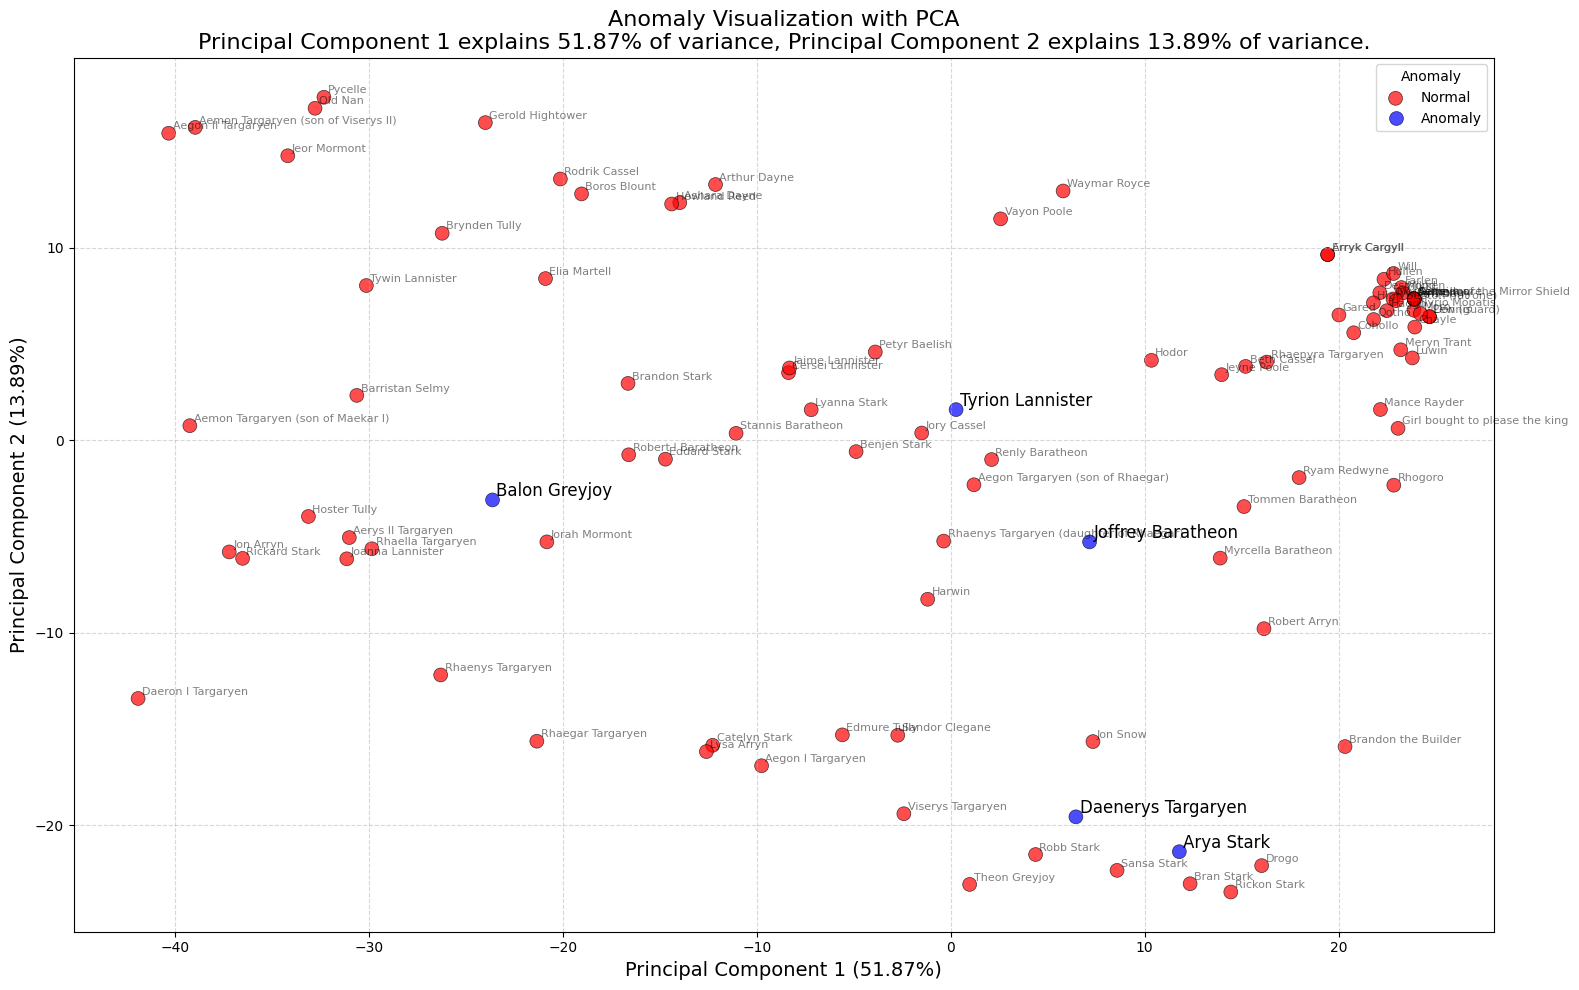

In [69]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize PCA with 2 components for 2D visualization
pca = PCA(n_components=2, random_state=42)

# Fit PCA on the feature set X and transform the data
X_pca = pca.fit_transform(X)

# Add the principal components to the DataFrame
characters_encoded_df['Principal Component 1'] = X_pca[:, 0]
characters_encoded_df['Principal Component 2'] = X_pca[:, 1]

# Calculate the percentage of variance explained by each component
explained_variance = pca.explained_variance_ratio_ * 100

# Create a scatter plot to visualize anomalies
plt.figure(figsize=(16, 10))
scatter = sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='anomaly',
    data=characters_encoded_df,
    palette=['blue', 'red'],
    alpha=0.7,
    s=100,  # Increase point size for better visibility
    edgecolor='k',  # Add edge color for points
    linewidth=0.5
)

# Annotate only the anomalies to reduce clutter
anomalies = characters_encoded_df[characters_encoded_df['anomaly'] == -1]
non_anomalies = characters_encoded_df[characters_encoded_df['anomaly'] == 1]
for idx, row in anomalies.iterrows():
    plt.text(
        row['Principal Component 1'] + 0.2,  # Slightly offset to prevent overlap
        row['Principal Component 2'] + 0.2,
        row['id'],
        color='black',
        fontsize=12,
        alpha=1
    )

for idx, row in non_anomalies.iterrows():
    plt.text(
        row['Principal Component 1'] + 0.2,  # Slightly offset to prevent overlap
        row['Principal Component 2'] + 0.2,
        row['id'],
        color='black',
        fontsize=8,
        alpha=0.5
    )


# Set plot title and labels with variance explained
plt.title(
    f'Anomaly Visualization with PCA\n'
    f'Principal Component 1 explains {explained_variance[0]:.2f}% of variance, '
    f'Principal Component 2 explains {explained_variance[1]:.2f}% of variance.',
    fontsize=16
)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f}%)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f}%)', fontsize=14)

# Customize the legend
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])

# Improve layout and aesthetics
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Display the plot
plt.show()
